Amazon Sales Data

Description:


This dataset contains information on #K+ Amazon products, including their ratings, reviews, and other details.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
data = pd.read_csv('amazon.csv')

In [ ]:
# Display the initial rows of the dataset
print(data.head())

# Display the data types of each column
print(data.dtypes)

# Provide a summary of the dataset
print(data.describe(include='all'))

    product_id                                       product_name  \
20  B09C6HXFC1  Duracell USB Lightning Apple Certified (Mfi) B...   
28  B09W5XR9RT  Duracell USB C To Lightning Apple Certified (M...   
32  B08QSC1XY8  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
33  B008FWZGSG  Samsung Original Type C to C Cable - 3.28 Feet...   
37  B09RZS1NQT  Sounce 65W OnePlus Dash Warp Charge Cable, 6.5...   

                                             category  discounted_price  \
20  Computers&Accessories|Accessories&Peripherals|...             970.0   
28  Computers&Accessories|Accessories&Peripherals|...             970.0   
32  Computers&Accessories|Accessories&Peripherals|...             389.0   
33  Computers&Accessories|Accessories&Peripherals|...             599.0   
37  Computers&Accessories|Accessories&Peripherals|...             199.0   

   actual_price  discount_percentage  rating  rating_count  \
20       ₹1,799                   46     4.5         815.0   
28       ₹

Data Cleaning

In [ ]:
# Check for missing values in the dataset
print(data.isnull().sum())

# Eliminate any duplicate records
data.drop_duplicates(inplace=True)












product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


Data Visualization

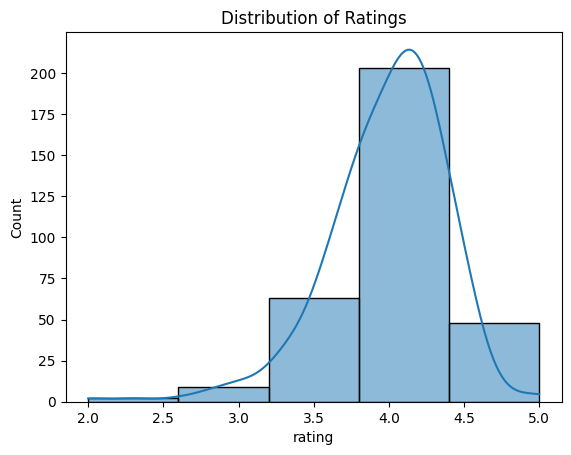

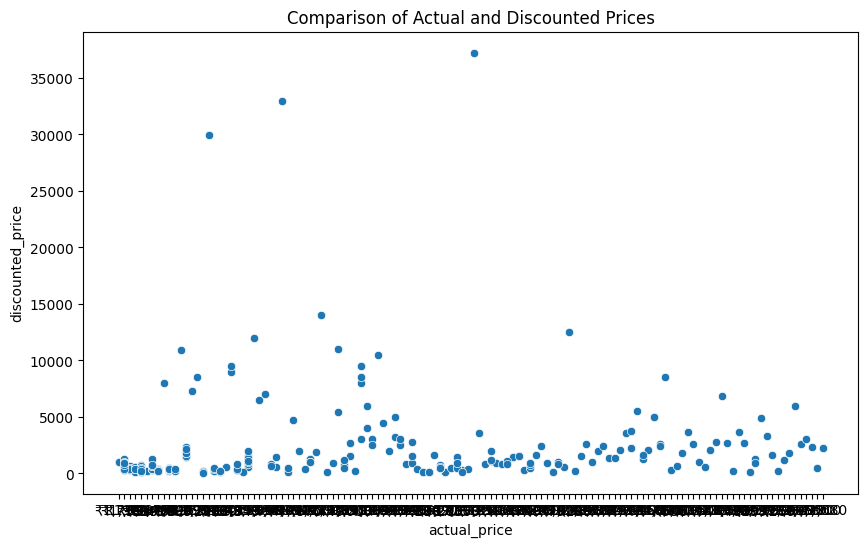

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram to show the distribution of ratings
sns.histplot(data['rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.show()

# Generate a scatter plot to visualize the relationship between actual and discounted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_price', y='discounted_price', data=data)
plt.title('Comparison of Actual and Discounted Prices')
plt.show()

1. Average rating for each product category ?

In [ ]:
import pandas as pd

# Convert the 'rating' column to numeric values, setting errors as NaN
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Remove rows with NaN values in the 'rating' column
data.dropna(subset=['rating'], inplace=True)

# Compute the average rating for each category
average_rating_per_category = data.groupby('category')['rating'].mean().reset_index()

# Output the results
print(average_rating_per_category)

                                             category    rating
0   Computers&Accessories|Accessories&Peripherals|...  3.900000
1   Computers&Accessories|Accessories&Peripherals|...  4.183051
2   Computers&Accessories|Accessories&Peripherals|...  4.100000
3   Computers&Accessories|Accessories&Peripherals|...  4.200000
4   Computers&Accessories|Accessories&Peripherals|...  3.900000
..                                                ...       ...
78  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...  3.900000
79  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...  4.450000
80  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...  3.533333
81  OfficeProducts|OfficePaperProducts|Paper|Copy&...  4.300000
82  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.200000

[83 rows x 2 columns]


2. Top rating_count products by category

In [ ]:
import pandas as pd

# Convert the 'rating_count' column to numeric, converting errors to NaN
data['rating_count'] = pd.to_numeric(data['rating_count'], errors='coerce')

# Remove rows where 'rating_count' is NaN
data.dropna(subset=['rating_count'], inplace=True)

# Identify the product with the maximum rating count in each category
top_rating_count_products = data.loc[data.groupby('category')['rating_count'].idxmax()].reset_index(drop=True)

# Display the results
print(top_rating_count_products)

    product_id                                       product_name  \
0   B09F3PDDRF  Lapster USB 3.0 sata Cable for 2.5 inch SSD an...   
1   B08QSC1XY8  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
2   B0BBMPH39N  Amazon Basics Magic Slate 8.5-inch LCD Writing...   
3   B0B9LDCX89  STRIFF Mpad Mouse Mat 230X190X3mm Gaming Mouse...   
4   B09GBBJV72  HP 330 Wireless Black Keyboard and Mouse Set w...   
..         ...                                                ...   
78  B08HDCWDXD  Eureka Forbes Active Clean 700 Watts Powerful ...   
79  B0B7FJNSZR  Proven® Copper + Mineral RO+UV+UF 10 to 12 Lit...   
80  B09BL2KHQW         KENT POWP-Sediment Filter 10'' Thread WCAP   
81  B095X38CJS  BRUSTRO Copytinta Coloured Craft Paper A4 Size...   
82  B099S26HWG  Classmate Pulse 1 Subject Notebook - 240mm x 1...   

                                             category  discounted_price  \
0   Computers&Accessories|Accessories&Peripherals|...             349.0   
1   Computers&Accesso

3.  Distribution of discounted prices vs. actual prices:

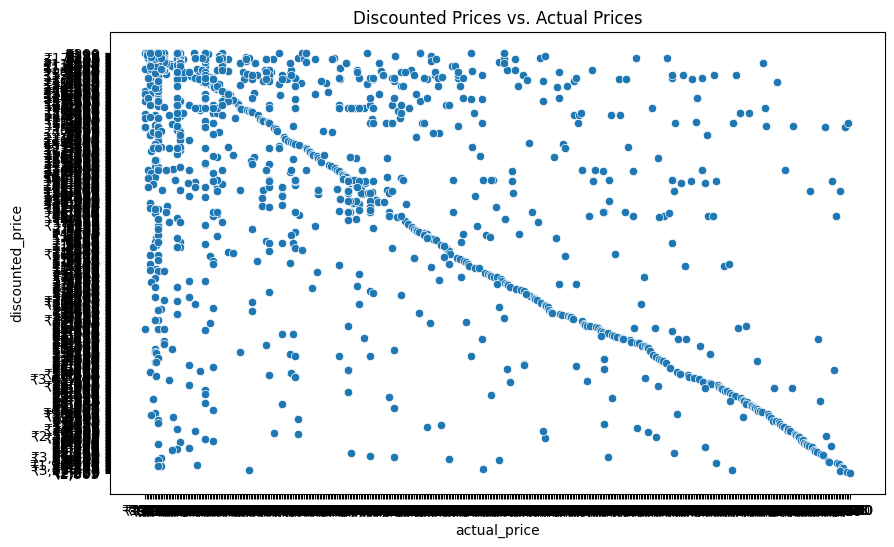

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actual_price', y='discounted_price', data=data)
plt.title('Discounted Prices vs. Actual Prices')
plt.show()

#The scatter plot presents a visual comparison of the actual prices and discounted prices for various products. Insights from this chart include:

#Trend Observation: A general trend is visible, showing that higher actual prices tend to have proportionally higher discounted prices.
#Discount Effectiveness: Some products exhibit significant discounts, with actual prices much higher than discounted prices, indicating deeper markdowns.
#Data Spread: The scatterplot helps identify outliers, where discounted prices do not follow the expected trend based on actual prices, suggesting unusual discounting strategies or promotions.

In [ ]:
4. Average discount percentage across categories:

In [ ]:

# Strip '%' symbols from 'discount_percentage' and convert the column to numeric
data['discount_percentage'] = data['discount_percentage'].str.replace('%', '', regex=False)
data['discount_percentage'] = pd.to_numeric(data['discount_percentage'], errors='coerce')

# Remove rows with NaN values in the 'discount_percentage' column
data.dropna(subset=['discount_percentage'], inplace=True)

# Compute the average discount percentage for each category
average_discount_percentage = data.groupby('category')['discount_percentage'].mean().reset_index()

# Output the results
print(average_discount_percentage)

                                             category  discount_percentage
0   Computers&Accessories|Accessories&Peripherals|...            65.000000
1   Computers&Accessories|Accessories&Peripherals|...            58.457627
2   Computers&Accessories|Accessories&Peripherals|...            68.333333
3   Computers&Accessories|Accessories&Peripherals|...            87.000000
4   Computers&Accessories|Accessories&Peripherals|...            36.000000
..                                                ...                  ...
78  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...            42.400000
79  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...            70.250000
80  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...            45.000000
81  OfficeProducts|OfficePaperProducts|Paper|Copy&...             0.000000
82  OfficeProducts|OfficePaperProducts|Paper|Stati...             0.000000

[83 rows x 2 columns]


5. Most popular product names ?

In [ ]:
most_popular_product_names = data['product_name'].value_counts().head(10)
print(most_popular_product_names)

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution             5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                      4
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)    3
MI Braided USB Type-C Cable for Charging Adapter (Red)                                                                                                                3
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                       3
Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus                                             

6. Most popular product keywords ?

In [ ]:
from collections import Counter
import re

# Extract keywords from the product names
all_keywords = ' '.join(data['product_name']).lower()
all_keywords = re.findall(r'\b\w+\b', all_keywords)
top_keywords = Counter(all_keywords).most_common(10)
print(top_keywords)







[('for', 204), ('with', 153), ('cable', 116), ('1', 101), ('black', 96), ('c', 89), ('and', 84), ('usb', 82), ('remote', 69), ('compatible', 66)]


7. Most popular product reviews:

In [ ]:
most_popular_reviews = data['review_content'].value_counts().head(10)
print(most_popular_reviews)

review_content
I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phone did not heat up even a littl

8. Correlation between discounted_price and rating:

In [ ]:

# Remove currency symbols and convert 'discounted_price' to numeric values
data['discounted_price'] = data['discounted_price'].replace({'₹': '', ',': ''}, regex=True)
data['discounted_price'] = pd.to_numeric(data['discounted_price'], errors='coerce')

# Convert the 'rating' column to numeric values if necessary
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Remove rows with NaN values in 'discounted_price' or 'rating'
data.dropna(subset=['discounted_price', 'rating'], inplace=True)

# Compute the correlation between 'discounted_price' and 'rating'
correlation = data[['discounted_price', 'rating']].corr()
print(correlation)

                  discounted_price   rating
discounted_price           1.00000  0.08152
rating                     0.08152  1.00000


9. Top 5 categories based on the highest ratings ?

In [ ]:

# Assuming 'data' is pre-loaded and cleaned

# Compute the average rating for each category
average_rating_per_category = data.groupby('category')['rating'].mean().reset_index()

# Order the categories by average rating in descending order and retrieve the top 5
top_5_categories = average_rating_per_category.sort_values(by='rating', ascending=False).head(5)

# Output the results
print(top_5_categories)

                                             category  rating
5   Computers&Accessories|Accessories&Peripherals|...    5.00
35  Electronics|Mobiles&Accessories|MobileAccessor...    4.60
20  Electronics|HomeAudio|MediaStreamingDevices|St...    4.50
79  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...    4.45
33  Electronics|Mobiles&Accessories|MobileAccessor...    4.40


10. Identifying potential areas for improvement or optimization ?

In [ ]:
Based on the analysis, potential opportunities for enhancement could include focusing on categories with lower average ratings or addressing products that have low discount percentages while being priced high.

 Que-2 Dataset Link:
Description of the Dataset:


The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of
approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape.
Each entry not only highlights the popularity and musical composition of the tracks but also underscores the
creative prowess of the artists and their profound impact on global listeners.





In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('spotify.csv')

# Show the initial rows of the dataframe
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


1.Load the dataframe and ensure data quality by checking for missing values and duplicate rows. Handle missing values and remove duplicate rows if necessary.


In [ ]:
# Identify missing values
missing_values = df.isnull().sum()

# Identify duplicate rows
duplicate_rows = df.duplicated().sum()

missing_values, duplicate_rows

(Artist           0
 Track Name       0
 Popularity       0
 Duration (ms)    0
 Track ID         0
 dtype: int64,
 27)

In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

# Remove rows with missing values
df = df.dropna()

# Confirm if there are any remaining missing values and duplicates
missing_values_after = df.isnull().sum().sum()
duplicate_rows_after = df.duplicated().sum()

missing_values_after, duplicate_rows_after

(0, 0)

2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

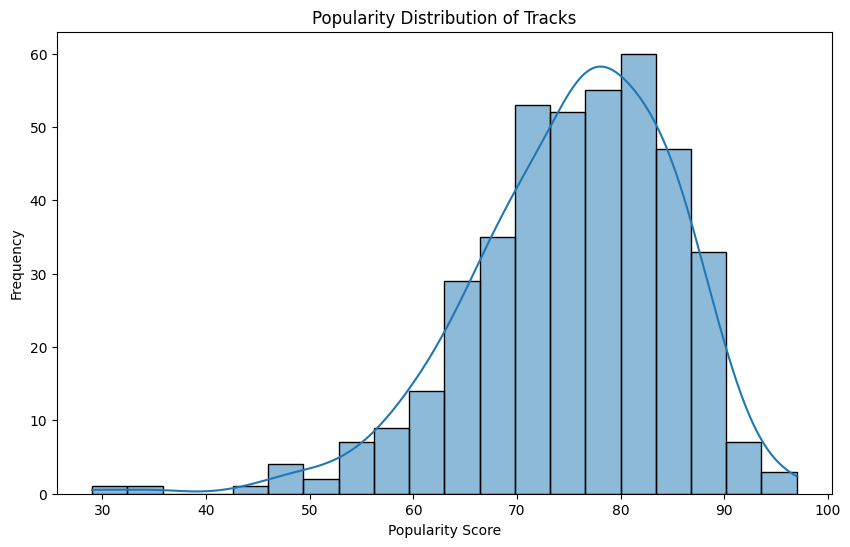

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of track popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True)
plt.title('Popularity Distribution of Tracks')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

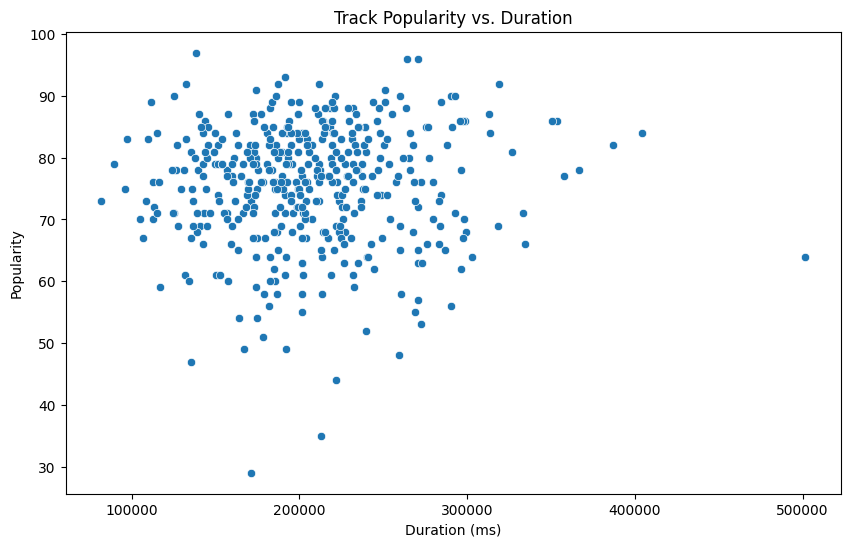

In [ ]:
# Create a scatter plot to visualize the relationship between track popularity and duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df)
plt.title('Track Popularity vs. Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist
using a countplot.

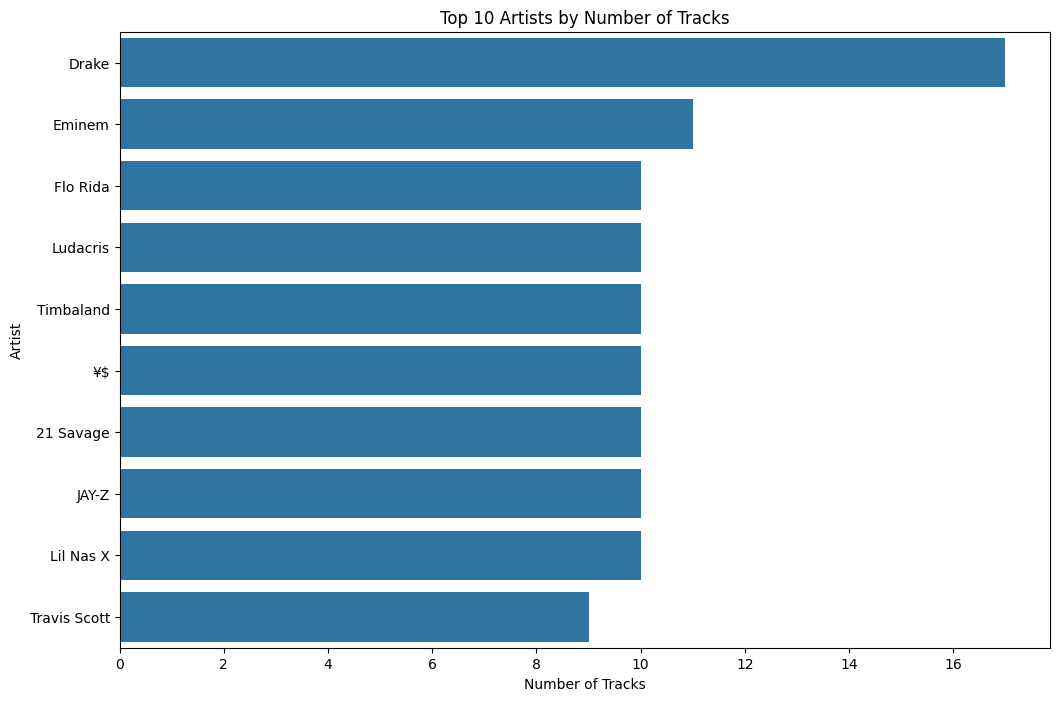

('Drake', 17)

In [ ]:
# Get the count of tracks for each artist
artist_track_counts = df['Artist'].value_counts()

# Create a countplot for the number of tracks by artist
plt.figure(figsize=(12, 8))
sns.countplot(y='Artist', data=df, order=artist_track_counts.index[:10])
plt.title('Top 10 Artists by Track Count')
plt.xlabel('Track Count')
plt.ylabel('Artist')
plt.show()

# Identify the artist with the most tracks
top_artist = artist_track_counts.idxmax()
top_artist, artist_track_counts.max()

5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [ ]:
# Retrieve the 5 least popular tracks
least_popular_tracks = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
least_popular_tracks

,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


6.Among the top 5 most popular artists, which artist has the highest popularity on average?
 Calculate and display the average popularity for each artist.


In [ ]:
# Compute the average popularity for each artist
artist_avg_popularity = df.groupby('Artist')['Popularity'].mean()

# Identify the top 5 artists with the highest average popularity
top_5_artists = artist_avg_popularity.nlargest(5)
top_5_artists

,Popularity
Artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,86.555556
¥$,85.100000


7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [ ]:

most_popular_tracks = df.loc[df.groupby('Artist')['Popularity'].idxmax()]
top_5_most_popular_tracks = most_popular_tracks[most_popular_tracks['Artist'].isin(top_5_artists.index)][['Artist', 'Track Name', 'Popularity']]
top_5_most_popular_tracks

,Artist,Track Name,Popularity
200,David Guetta,Baby Don't Hurt Me,87
30,Travis Scott,FE!N (feat. Playboi Carti),93
241,Trueno,Mamichula - con Nicki Nicole,89
140,cassö,Prada,92
260,¥$,CARNIVAL,96


8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

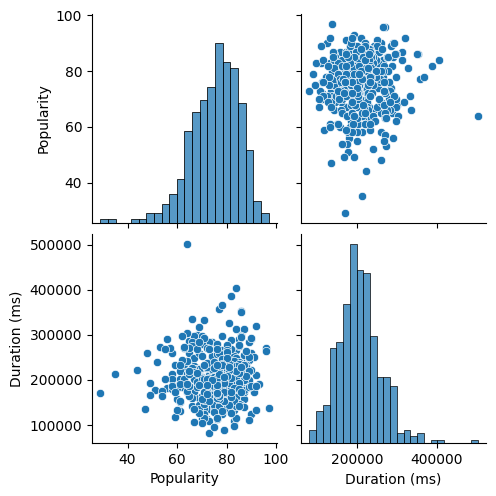

In [ ]:
# Select numerical columns for the pairplot
numerical_columns = ['Popularity', 'Duration (ms)']

# pair plot
sns.pairplot(df[numerical_columns])
plt.show()

9.Does the duration of tracks vary significantly across different artists?
Explore this visually using a box plot or violin plot.

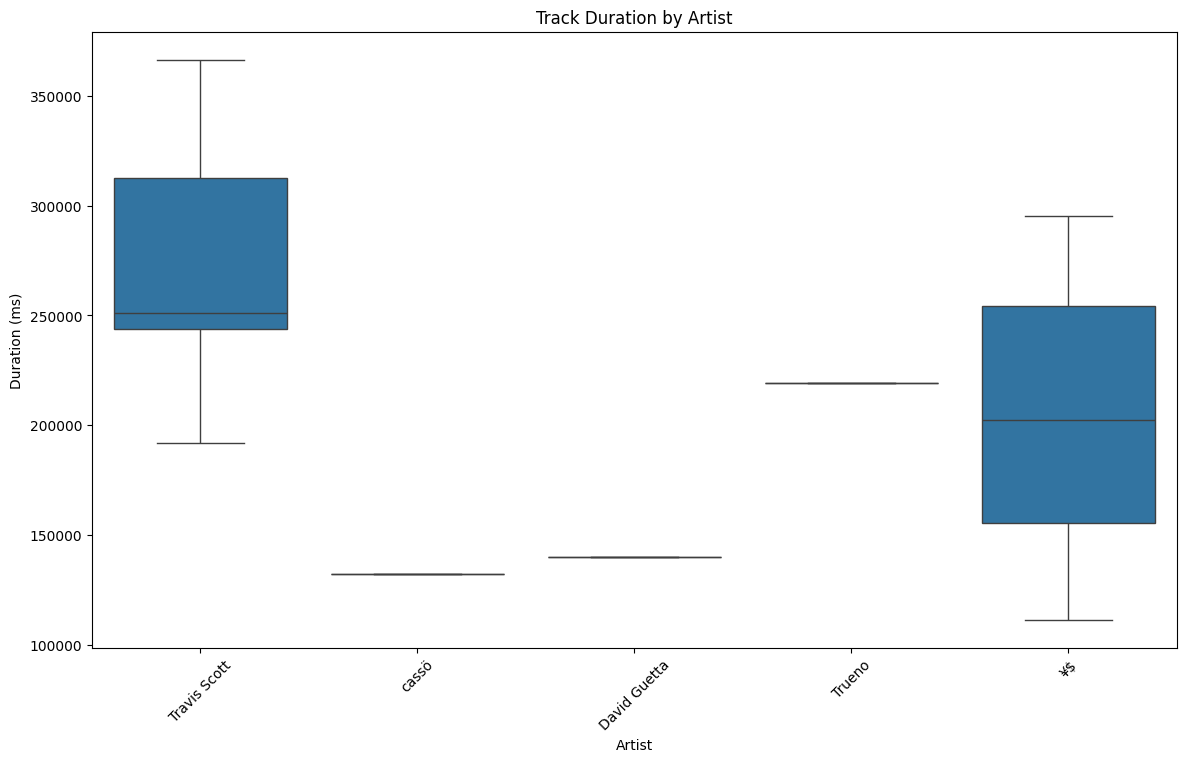

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Artist', y='Duration (ms)', data=df[df['Artist'].isin(top_5_artists.index)])
plt.title('Track Duration by Artist')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45)
plt.show()

10.How does the distribution of track popularity vary for different artists?
Visualize this using a swarm plot or a violin plot.


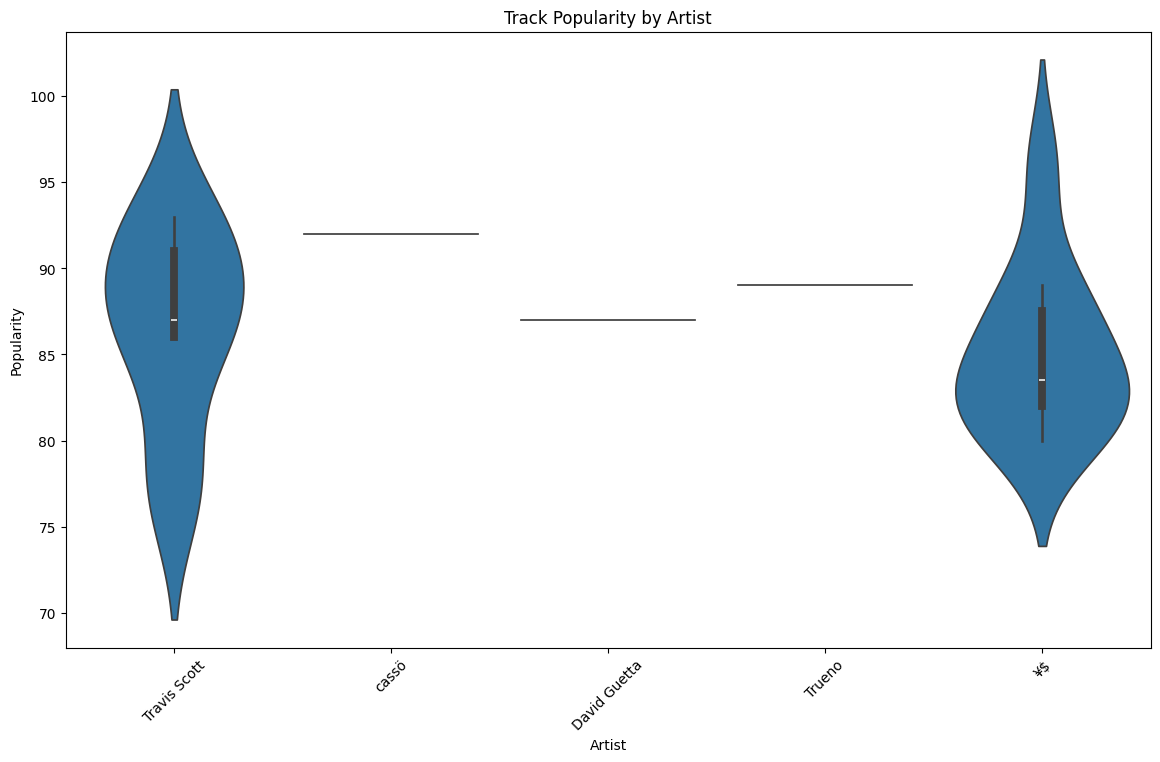

In [ ]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Artist', y='Popularity', data=df[df['Artist'].isin(top_5_artists.index)])
plt.title('Popularity of Tracks by Artist')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()